<a href="https://colab.research.google.com/github/adaryass/Applied-Mathematics-and-Finance/blob/main/M%C3%A9thode_de_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Ce code utilise la méthode de Monte Carlo pour simuler l'évolution du prix d'un actif (comme une action) sur une période donnée.


1. **Initialisation :** On définit le prix initial de l'actif (`S`), le taux sans risque (`mu`), la volatilité (`sigma`), et le nombre de jours dans la période (`N`). Dans cet exemple, nous utilisons les valeurs suivantes : `S=100`, `mu=0.002`, `sigma=0.01`, et `N=252` (représentant le nombre de jours de négociation à la bourse française dans une année).
2. **Simulation :** La fonction `stock_Monte_Carlo` effectue un nombre spécifié de simulations (`Number_of_simulations`). Pour chaque simulation, elle génère une série de prix quotidiens pour l'actif en utilisant un mouvement brownien géométrique (une formule courante pour modéliser les prix d'actifs aléatoires).
3. **Résultats :** Les prix simulés sont stockés dans un DataFrame pandas. La moyenne des prix pour chaque jour est également calculée.
4. **Visualisation :** Deux graphiques sont générés :
   - Le premier montre toutes les simulations individuelles de l'évolution du prix de l'actif, c'est-à-dire les différentes trajectoires possibles de S(t).
   - Le second montre l'évolution moyenne du prix de l'actif sur la période simulée.

Cette méthode est utile pour comprendre les trajectoires possibles du prix d'un actif et pour estimer des valeurs comme le prix futur attendu.

              0           1           2           3           4           5  \
0    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1     98.342849  101.096732  100.764094   99.607647  101.724402  100.157286   
2     98.475395  101.556716  101.108057   99.820873  101.984334  101.061505   
3     99.395933  100.384546  103.419360  100.709870  103.227795  101.356176   
4    100.322874   99.528253  103.342565  100.297689  102.344476  101.889937   
..          ...         ...         ...         ...         ...         ...   
248  195.253073  165.774992  164.312489  138.038635  195.746248  148.183110   
249  195.237732  167.201406  163.106296  141.695251  193.966272  149.892454   
250  192.874394  168.341775  164.956404  142.510305  196.398497  147.345648   
251  191.976211  167.790257  163.847958  144.860154  196.359403  148.685967   
252  189.895280  166.861633  166.022967  145.728936  195.517804  150.738866   

              6           7           8           9

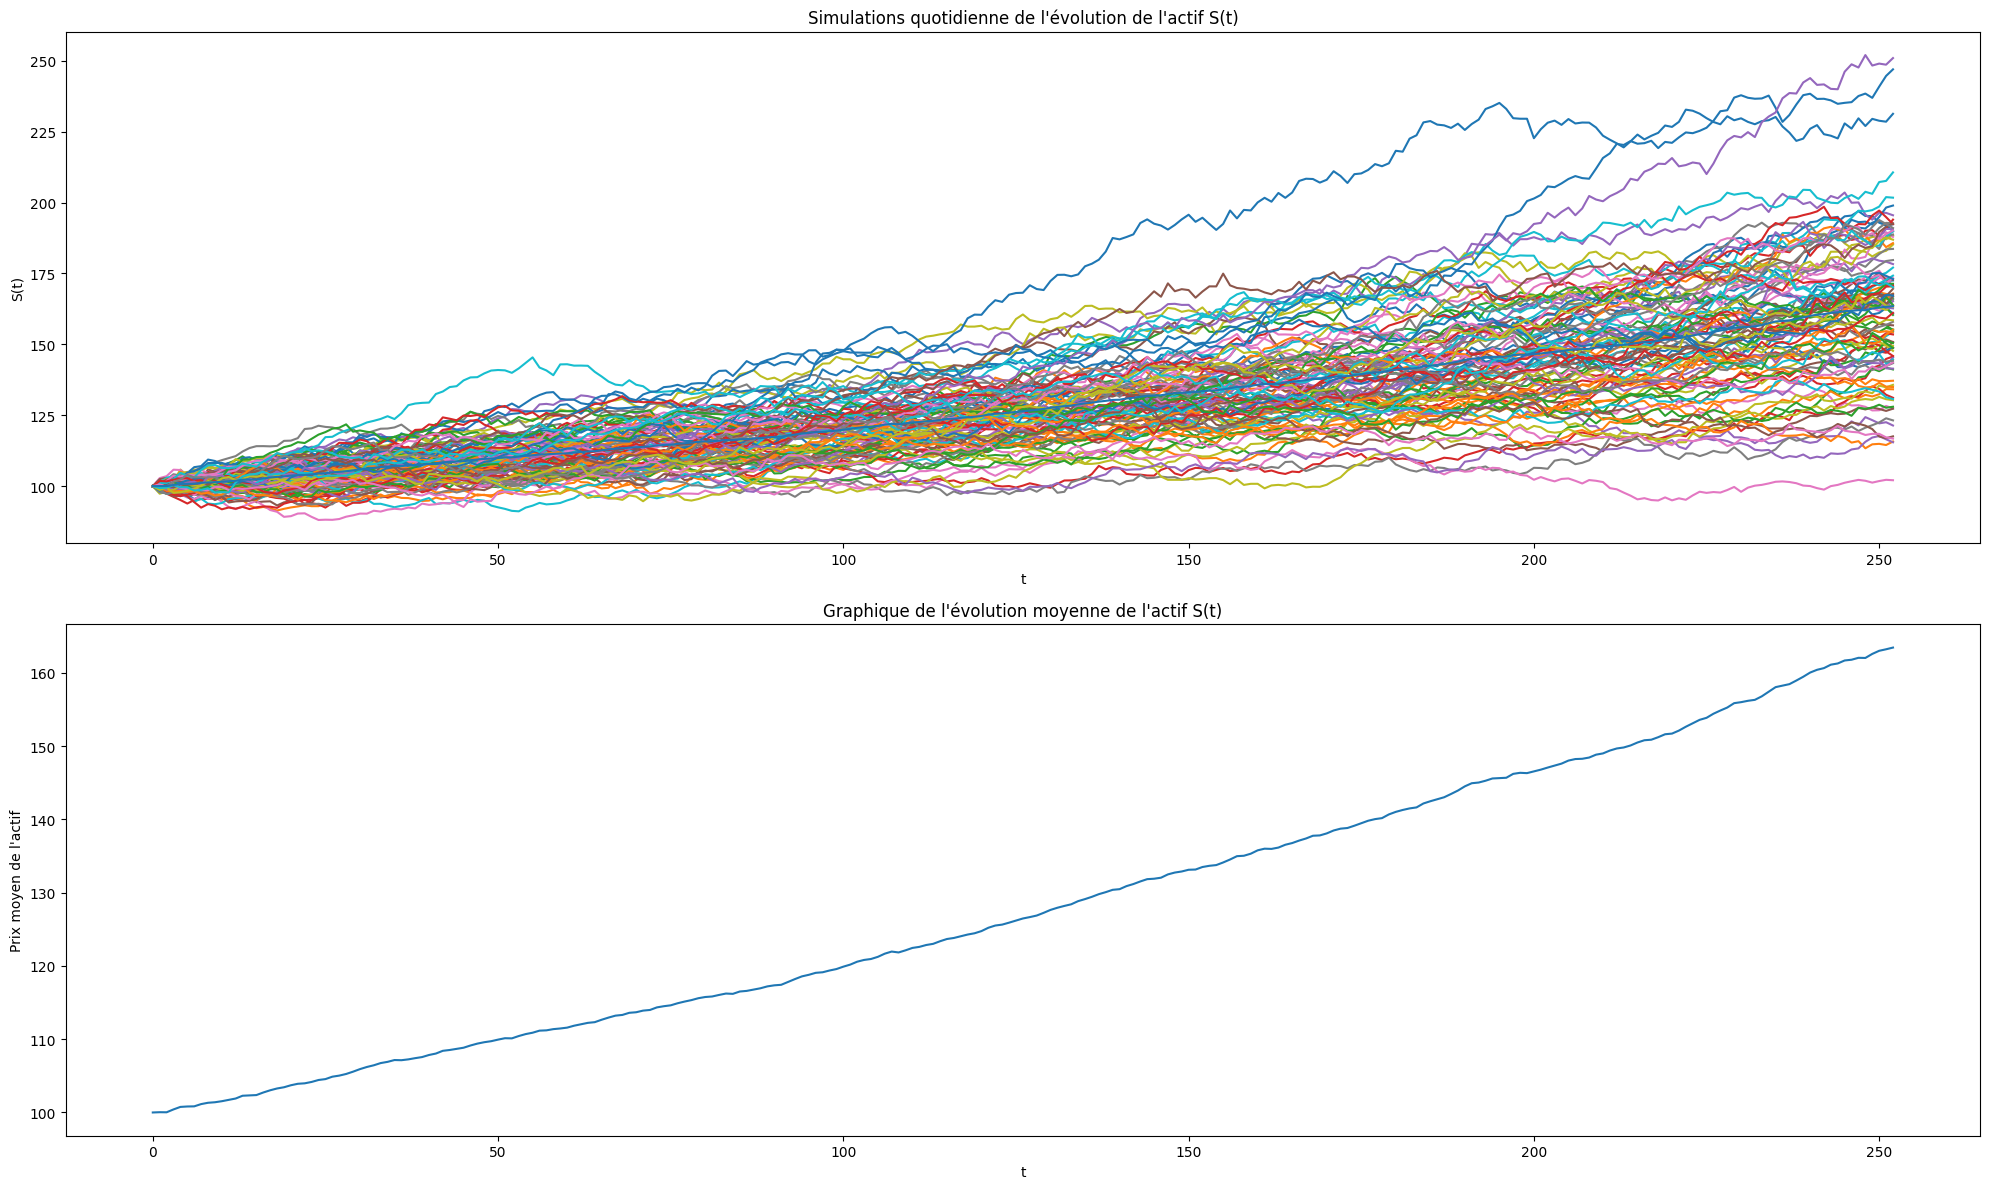

In [11]:
Number_of_simulations = 100

def stock_Monte_Carlo(S, mu, sigma, N = 252):
  resultat = []

  # Nombre de simulation possible de l'actif S(t) (du process)
  for _ in range(Number_of_simulations):
    prices = [S]
    for _ in range(N) :
      # Nous simulons l'évolutions de l'actif S(t) jour par jour
      stock_price = prices[-1] * np.exp((mu - 0.5 * sigma**2) +
                                        sigma * np.random.normal())
      prices.append(stock_price)

    resultat.append(prices)

  donée_simulée =  pd.DataFrame(resultat)
  # les colonnes données contiendront la série temporelle d'une simulation donnée
  donée_simulée = donée_simulée.T
  donée_simulée['mean'] = donée_simulée.mean(axis=1)

  print(donée_simulée)

  fig, axes = plt.subplots(2, 1, figsize=(20, 12))

  axes[0].plot(donée_simulée)
  axes[0].set_title("Simulations quotidienne de l'évolution de l'actif S(t)")
  axes[0].set_xlabel("t")
  axes[0].set_ylabel("S(t)")
  # Deuxième graphique (en bas)
  axes[1].plot(donée_simulée['mean'])
  axes[1].set_title("Graphique de l'évolution moyenne de l'actif S(t)")
  axes[1].set_xlabel("t")
  axes[1].set_ylabel("Prix moyen de l'actif")
  # Ajustement de l'espacement entre les sous-graphiques
  plt.tight_layout()

  #plt.figure(figsize=(12, 6), )
  #plt.plot(donée_simulée)
  #plt.plot(donée_simulée['mean'])

  #plt.show()

if __name__ == "__main__":
  # Commençons par poser la valeurs des parametrs
  S = 100
  # La valeur du Taux sans risque,
  # ou la valeur de l'esperance de rantabilité de l'actif
  mu = 0.002
  # La valeur de la volatilité implicite sigma
  sigma = 0.01
  #
  stock_Monte_Carlo(S, mu, sigma)



### Graphique dynamique

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
from mpld3.plugins import LineLabelTooltip

# Assurez-vous que la fonction stock_Monte_Carlo est définie dans une cellule précédente
# ou incluse ici si elle n'est pas déjà disponible.

def stock_Monte_Carlo(S, mu, sigma, N = 252, Number_of_simulations=100):
  resultat = []

  for _ in range(Number_of_simulations):
    prices = [S]
    for _ in range(N) :
      stock_price = prices[-1] * np.exp((mu - 0.5 * sigma**2) +
                                        sigma * np.random.normal())
      prices.append(stock_price)
    resultat.append(prices)

  donée_simulée =  pd.DataFrame(resultat)
  donée_simulée = donée_simulée.T
  donée_simulée['mean'] = donée_simulée.mean(axis=1)

  #print(donée_simulée) # On peut commenter cette ligne pour ne pas afficher le DataFrame à chaque mise à jour

  fig, ax = plt.subplots(1, 1, figsize=(20, 12))

  # Plot individual simulations with tooltips
  lines = []
  labels = []
  for col in donée_simulée.drop('mean', axis=1).columns:
      line, = ax.plot(donée_simulée[col], label=f'Simulation {col}')
      lines.append(line)
      labels.append(f'Simulation {col}')


  # Add tooltips to the individual simulations
  tooltip = LineLabelTooltip(lines, labels)
  mpld3.plugins.connect(fig, tooltip)


  # Plot the mean evolution with tooltip
  line_mean, = ax.plot(donée_simulée['mean'], label='Mean Evolution', color='black', linewidth=2)
  # Add tooltip to the mean evolution line
  tooltip_mean = mpld3.plugins.LineLabelTooltip([line_mean], ['Mean Evolution'])
  mpld3.plugins.connect(fig, tooltip_mean)


  ax.set_title("Simulations quotidienne de l'évolution de l'actif S(t)")
  ax.set_xlabel("t")
  ax.set_ylabel("S(t)")


  plt.tight_layout()

  # Use mpld3 to display the interactive plot
  mpld3.display(fig)
  plt.show()


Number_of_simulations_widget = widgets.IntSlider(
    value=100,
    min=10,
    max=1000,
    step=10,
    description='Nombre de simulations:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

mu_widget = widgets.FloatSlider(
    value=0.002,
    min=0.0001,
    max=0.01,
    step=0.0001,
    description='mu:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.4f'
)

sigma_widget = widgets.FloatSlider(
    value=0.01,
    min=0.001,
    max=0.1,
    step=0.001,
    description='sigma:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f'
)


def run_simulation(Number_of_simulations, mu, sigma):
    # Paramètres de la simulation
    S = 100
    N = 252 # Nombre de jours de négociation

    # Appeler la fonction de simulation avec les valeurs des widgets
    stock_Monte_Carlo(S, mu, sigma, N=N, Number_of_simulations=Number_of_simulations)

if __name__ == "__main__":
  display(Number_of_simulations_widget)
  display(mu_widget)
  display(sigma_widget)

  widgets.interactive(run_simulation,
                      Number_of_simulations=Number_of_simulations_widget,
                      mu=mu_widget,
                      sigma=sigma_widget)